<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout12_PartB_CrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #12 - Part B: Cross-Validation Methods

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Texas School Districts - Teacher Turnover

**Example 12.1**:  Consider the following data from school districts in Texas.  This investigation centers on understanding what influences the turnover rate of teachers.  There are a total of four predictor variables under consideration here.  
<table>
  <tr>
    <td width='50%'>
      <ul>
        <li>Response Variable: TeacherTurnoverRate; percent of teachers that leave each year</li><br>
        <li>Variables under investigation (i.e. independent variables)</li>
        <ul>
          <li>Pct_EconomicDisadvanted - percent of students in high school that are economically disadvantaged</li>
          <li>FourYearGradRate - percent of students who graduate in 4 years</li>
          <li>Avg_TeacherSalary - average teacher salary in school</li>
          <li>Pct_RevenueLocal - percent of revenue that comes from local community 
         </ul>
    </ul>
    </td>
    <td width='50%'>
    <p align='center'><img src="https://drive.google.com/uc?export=view&id=1RKq_ZUpUg75MIPK5bljWb7o-BsNeW_8V" width="50%" height="50%"></img></p>
      
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>




## Load data into COLAB Session

First, load the tidyverse() package.

In [3]:
#load tidyverse package
library(tidyverse)

Next, read in the dataset.

In [27]:
# Reading data in using read_csv 
TeacherTurnover <- read_csv("http://www.StatsClass.org/stat360/Datasets/TexasSchoolDistricts_TeacherTurnover.csv")

Rows: 1228 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): DistrictName
dbl (5): Pct_EconomicDisadvantaged, FourYearGradRate, Avg_TeacherSalary, Pct...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Taking a quick look at the data...

In [28]:
dim(TeacherTurnover)
head(TeacherTurnover)

[1] 1228    6

DistrictName,Pct_EconomicDisadvantaged,FourYearGradRate,Avg_TeacherSalary,Pct_RevenueLocal,TeacherTurnoverRate
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CAYUGA ISD,38.2,92.1,45082,44.1,9.8
ELKHART ISD,51.5,98.6,40536,33.8,19.7
FRANKSTON ISD,59.0,100.0,42427,44.4,30.9
NECHES ISD,41.9,100.0,41691,38.8,12.1
PALESTINE ISD,76.1,89.7,42455,48.9,25.3
WESTWOOD ISD,61.9,94.2,40148,39.1,24.9


There are a small number of districts that have missing information.  The drop_na() function can be used to remove all NAs from the data.frame.

In [29]:
(TeacherTurnover
  %>% drop_na()      #na.omit() will also work to get rid of NAs
) -> TeacherTurnover_NoNAs

dim(TeacherTurnover_NoNAs)

[1] 1053    6

## Model Considerations

A total of four models will be considered here.


1.   Model #1: TeacherTurnoverRate ~ Pct_EconomicDisadvantaged
2.   Model #2: TeacherTurnoverRate ~ FourYearGradRate
3.   Model #3: TeacherTurnoverRate ~ Avg_TeacherSalary
4.   Model #4: TeacherTurnoverRate ~ Pct_RevenueLocal



### Model #1: TeacherTurnoverRate ~ Pct_EconomicDisadvantaged

In [15]:
LM_TeacherTurnoverRate_PCTEconomicDisadvantaged <- lm(TeacherTurnoverRate ~ Pct_EconomicDisadvantaged, data=TeacherTurnover_NoNAs)
summary(LM_TeacherTurnoverRate_PCTEconomicDisadvantaged)


Call:
lm(formula = TeacherTurnoverRate ~ Pct_EconomicDisadvantaged, 
    data = TeacherTurnover_NoNAs)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.309  -6.386  -1.715   4.525  73.752 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                8.74365    1.05311   8.303  3.1e-16 ***
Pct_EconomicDisadvantaged  0.18843    0.01694  11.122  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.53 on 1051 degrees of freedom
Multiple R-squared:  0.1053,	Adjusted R-squared:  0.1045 
F-statistic: 123.7 on 1 and 1051 DF,  p-value: < 2.2e-16


### Model #2: TeacherTurnoverRate ~ FourYearGradRate

In [16]:
LM_TeacherTurnoverRate_FourYearGradRate <- lm(TeacherTurnoverRate ~ FourYearGradRate, data=TeacherTurnover_NoNAs)
summary(LM_TeacherTurnoverRate_FourYearGradRate)


Call:
lm(formula = TeacherTurnoverRate ~ FourYearGradRate, data = TeacherTurnover_NoNAs)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.912  -6.678  -1.947   4.492  55.194 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      50.72372    2.38376   21.28   <2e-16 ***
FourYearGradRate -0.33623    0.02576  -13.05   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.33 on 1051 degrees of freedom
Multiple R-squared:  0.1395,	Adjusted R-squared:  0.1387 
F-statistic: 170.4 on 1 and 1051 DF,  p-value: < 2.2e-16


### Model #3: TeacherTurnoverRate ~ Avg_TeacherSalary


In [17]:
LM_TeacherTurnoverRate_AvgTeacherSalary <- lm(TeacherTurnoverRate ~ Avg_TeacherSalary, data=TeacherTurnover_NoNAs)
summary(LM_TeacherTurnoverRate_AvgTeacherSalary)


Call:
lm(formula = TeacherTurnoverRate ~ Avg_TeacherSalary, data = TeacherTurnover_NoNAs)

Residuals:
    Min      1Q  Median      3Q     Max 
-27.924  -5.932  -1.298   4.728  68.412 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.812e+01  3.163e+00   21.54   <2e-16 ***
Avg_TeacherSalary -1.089e-03  7.109e-05  -15.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.07 on 1051 degrees of freedom
Multiple R-squared:  0.1826,	Adjusted R-squared:  0.1818 
F-statistic: 234.8 on 1 and 1051 DF,  p-value: < 2.2e-16


### Model #4: TeacherTurnoverRate ~ Pct_RevenueLocal

In [32]:
LM_TeacherTurnoverRate_PctRevenueLocal <- lm(TeacherTurnoverRate ~ Pct_RevenueLocal, data=TeacherTurnover_NoNAs)
summary(LM_TeacherTurnoverRate_PctRevenueLocal)


Call:
lm(formula = TeacherTurnoverRate ~ Pct_RevenueLocal, data = TeacherTurnover_NoNAs)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.138  -6.561  -1.657   4.306  74.921 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      26.09634    0.71634  36.430   <2e-16 ***
Pct_RevenueLocal -0.15178    0.01556  -9.756   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.66 on 1051 degrees of freedom
Multiple R-squared:  0.08305,	Adjusted R-squared:  0.08217 
F-statistic: 95.19 on 1 and 1051 DF,  p-value: < 2.2e-16


## Custom Jackknife Function to Measure Prediction Accuracy

The following custom function can be used to obtain a jackknife estimate for the Root Mean Square Error.

In [19]:
#Custom function to compute the RMSE - Jackknife Estimate
rmse.jackknife=function(slr_object,data_for_fit){

    #A custom function for obtaining RMSE via Jackknife
    #INPUTS
    #      This function takes two input arguments
    #      1) A simple linear regression object, and 
    #      2) data.frame used for fitting SLR model
    #OUTPUTS
    #     This function returns as output
    #      1) vector of squared residuals
    #      2) the jackknife estimate of RMSE

    #Getting the number of rows in data
    n = dim(data_for_fit)[1]

    #Keeping a copy of orginial y (used in computed residual)
    originaly = slr_object$model[,1]
    
    #Creating the output vector to save squared residuals
    output = rep(0,n)

    #Looping through data 
    for(i in 1:n){
        fit_minus_i = lm( formula(slr_object), data=data_for_fit[-i,] )
        predictedy_i = predict( fit_minus_i , newdata=data_for_fit[i,] )
        output[i] = ( originaly[i] - predictedy_i )^2
    }
    
    #Return the output vector and jackknife rmse
    #list(SquaredResids=output,Jackknife_RMSE=sqrt(mean(output, na.rm=TRUE)))
    return(Jackknife_RMSE=sqrt(mean(output, na.rm=TRUE)))
}

Using the rmse.jackknife() function for the data considered here.

In [33]:
cat("\nJackknife Estimate of RMSE for PCT_EconomicDisadvantaged:")
round( rmse.jackknife(LM_TeacherTurnoverRate_PCTEconomicDisadvantaged, TeacherTurnover_NoNAs), 2)

cat("\nJackknife Estimate of RMSE for FourYearGradRate:")
round( rmse.jackknife(LM_TeacherTurnoverRate_FourYearGradRate, TeacherTurnover_NoNAs), 2)

cat("\nJackknife Estimate of RMSE for AvgTeacherSalary:")
round( rmse.jackknife(LM_TeacherTurnoverRate_AvgTeacherSalary, TeacherTurnover_NoNAs), 2)

cat("\nJackknife Estimate of RMSE for Pct_RevenueLocal:")
round( rmse.jackknife(LM_TeacherTurnoverRate_PctRevenueLocal, TeacherTurnover_NoNAs), 2)



Jackknife Estimate of RMSE for PCT_EconomicDisadvantaged:

[1] 10.55


Jackknife Estimate of RMSE for FourYearGradRate:

[1] 10.37


Jackknife Estimate of RMSE for AvgTeacherSalary:

[1] 10.08


Jackknife Estimate of RMSE for Pct_RevenueLocal:

[1] 10.68



---



---



## CARET Package: Leave-one-out

The caret() package in R is the primary package for doing cross-validation of models.  First, let's load this package.

**Note**:  This will take about 5 minutes to load into COLAB.

In [ ]:
install.packages("caret")
library(caret)

The following code can be used to run a "leave-one-out" cross-validation algorithm with the caret package in R.

In [35]:
#Using the caret package to conduct the leave-one-out cross validation
#The cross-validation settings are set with the trainControl() function.
#Here, the leave-one-out cross validation (LOOCV) is being specifed
cv_settings <- trainControl(method = "LOOCV")

#Next, use the train() function to conduct the cross-validation procedure for this data/model
LOOCV_TeacherTurnoverRate_AvgTeacherSalary <- train(
                                                     TeacherTurnoverRate ~ Avg_TeacherSalary ,   # model to fit
                                                     data = TeacherTurnover_NoNAs,               # data used for the fit   
                                                     trControl = cv_settings,                    # settings for cross-validation
                                                     method = "lm",                              # specifying a regression model
                                                     na.action = na.pass                         # helps with NA
                                                    )

#Print the output from the LOOCV algorithm
LOOCV_TeacherTurnoverRate_AvgTeacherSalary

Linear Regression 

1053 samples
   1 predictor

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 1052, 1052, 1052, 1052, 1052, 1052, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  10.08144  0.1787502  7.178362

Tuning parameter 'intercept' was held constant at a value of TRUE

In addition to the $RMSE$, the $R^2$ and $MAE$ are computed as well on the test set.

$$
MAE = \frac{\sum |y_{i} - \hat{y}_{i}|}{n}
$$
where $\hat{y}_{i}$ is the predicted value for the $i^{th}$ observation



---



---



##  Train / Test Cross-Validation Algorithm

<u>Step #1</u>:  Divide the data into the train and test set

In [44]:
#How many rows in data.frame
dim(TeacherTurnover_NoNAs)

[1] 1053    6

In [45]:
#Create a rowid vector
rowid <- seq(from=1, to=1053, by=1)

#Obtain the training set
train <- sample(rowid, size = (0.75*length(rowid)), replace=FALSE)
sort(train)

cat("\nHow many observations in training set:")
length(train)

[1]    1    2    3    4    6    7   10   11   12   13   14   15   16   17   19
 [16]   20   21   22   23   25   26   27   29   30   31   32   33   35   36   37
 [31]   38   39   40   42   44   46   50   52   54   55   56   57   58   59   61
 [46]   62   63   64   65   67   68   71   72   73   74   75   76   77   78   79
 [61]   80   81   82   83   85   86   87   91   93   94   95   97   98  101  103
 [76]  104  105  108  110  111  112  114  116  118  119  120  122  123  126  127
 [91]  130  131  133  134  135  136  137  138  140  141  142  144  145  146  147
[106]  149  150  152  153  154  155  156  157  158  159  160  161  162  163  165
[121]  166  168  169  170  172  174  175  176  177  178  179  180  181  183  184
[136]  186  188  189  190  191  192  193  195  196  197  199  200  201  203  206
[151]  208  210  211  212  213  215  216  217  218  219  220  221  222  226  227
[166]  228  229  230  232  234  235  237  238  239  240  242  244  245  247  250
[181]  251  252  253  254  255  257  258  259  260  261  262  263  264  265  268
[196]  270  271  273  274  277  278  279  281  282  283  284  285  286  289  290
[211]  292  293  294  295  296  298  299  300  301  302  304  307  309  310  311
[226]  312  313  314  315  316  318  319  320  321  325  328  329  330  333  334
[241]  335  337  338  339  340  342  344  345  346  347  348  349  350  351  352
[256]  353  354  355  356  360  361  363  364  366  368  369  371  372  373  374
[271]  375  376  377  378  379  380  381  382  383  385  387  390  391  392  393
[286]  394  395  396  397  398  399  400  401  402  404  405  406  407  409  410
[301]  411  412  413  414  415  416  417  418  420  421  422  423  426  427  428
[316]  430  431  433  434  436  437  438  439  440  441  442  443  444  446  448
[331]  449  450  451  453  454  455  456  457  459  460  461  464  465  466  467
[346]  468  469  470  471  474  475  476  477  478  480  481  483  484  485  486
[361]  487  488  490  491  493  495  496  497  498  499  500  501  502  503  504
[376]  505  506  507  508  509  510  512  514  516  517  521  523  524  525  526
[391]  527  529  530  531  532  533  535  536  537  538  539  540  541  543  545
[406]  547  548  554  555  556  558  560  562  563  564  568  569  570  571  572
[421]  573  575  577  579  580  581  582  583  587  588  589  591  593  595  596
[436]  597  598  599  600  601  602  604  605  606  607  608  609  611  612  613
[451]  614  615  617  618  619  620  622  623  624  625  626  628  629  631  633
[466]  634  635  636  637  638  639  641  643  644  645  648  649  650  651  652
[481]  653  654  655  656  658  662  663  664  665  666  667  671  672  673  674
[496]  676  677  678  679  680  681  682  683  684  685  686  687  688  689  691
[511]  692  693  694  695  696  699  700  701  702  703  704  705  706  707  708
[526]  709  710  711  713  714  715  717  718  720  721  722  723  725  726  727
[541]  728  729  730  731  732  733  734  736  737  738  740  741  742  744  745
[556]  746  747  748  749  750  751  753  754  755  756  757  758  761  763  764
[571]  768  769  770  774  776  777  778  780  781  782  783  784  786  787  788
[586]  789  791  792  793  795  797  798  799  800  802  805  806  808  809  810
[601]  812  813  814  816  819  820  821  822  823  825  827  828  829  830  831
[616]  833  834  835  836  837  838  839  840  841  843  844  845  846  847  848
[631]  849  851  852  853  854  856  857  858  859  860  862  863  864  866  868
[646]  869  870  872  873  874  875  876  877  879  880  881  882  884  885  886
[661]  887  888  889  890  891  892  893  894  895  896  897  898  899  901  902
[676]  904  906  908  910  911  912  913  916  917  918  919  923  924  925  926
[691]  927  928  929  931  932  933  934  935  936  937  938  939  940  941  943
[706]  944  945  946  947  948  949  950  951  954  956  957  959  961  962  963
[721]  964  965  967  968  969  971  972  973  974  975  976  977  979  980  981
[736]  982  984  986  988  989  9


How many observations in training set:

[1] 789

In [46]:
#Obtain the test set
test <- rowid[-train]
sort(test)

cat("\nHow many observations in test set:")
length(test)

[1]    5    8    9   18   24   28   34   41   43   45   47   48   49   51   53
 [16]   60   66   69   70   84   88   89   90   92   96   99  100  102  106  107
 [31]  109  113  115  117  121  124  125  128  129  132  139  143  148  151  164
 [46]  167  171  173  182  185  187  194  198  202  204  205  207  209  214  223
 [61]  224  225  231  233  236  241  243  246  248  249  256  266  267  269  272
 [76]  275  276  280  287  288  291  297  303  305  306  308  317  322  323  324
 [91]  326  327  331  332  336  341  343  357  358  359  362  365  367  370  384
[106]  386  388  389  403  408  419  424  425  429  432  435  445  447  452  458
[121]  462  463  472  473  479  482  489  492  494  511  513  515  518  519  520
[136]  522  528  534  542  544  546  549  550  551  552  553  557  559  561  565
[151]  566  567  574  576  578  584  585  586  590  592  594  603  610  616  621
[166]  627  630  632  640  642  646  647  657  659  660  661  668  669  670  675
[181]  690  697  698  712  716  719  724  735  739  743  752  759  760  762  765
[196]  766  767  771  772  773  775  779  785  790  794  796  801  803  804  807
[211]  811  815  817  818  824  826  832  842  850  855  861  865  867  871  878
[226]  883  900  903  905  907  909  914  915  920  921  922  930  942  952  953
[241]  955  958  960  966  970  978  983  985  987  994 1001 1007 1014 1016 1017
[256] 1026 1029 1033 1035 1043 1047 1048 1049 1052


How many observations in test set:

[1] 264

<u>Step #2</u>: Fit the model usign the Training set

In [47]:
SplitSampleCV_TeacherTurnoverRate_AvgTeacherSalary <- lm(TeacherTurnoverRate ~ Avg_TeacherSalary, data=TeacherTurnover_NoNAs[train,])

<u>Step #3</u>: Make predictions for observations in Test set and obtain RMSE from these predictions

In [48]:
(TeacherTurnover_NoNAs[test,]
    %>% mutate(Predicted = predict(SplitSampleCV_TeacherTurnoverRate_AvgTeacherSalary, newdata=TeacherTurnover_NoNAs[test,]))
    %>% mutate(Residual = (TeacherTurnoverRate - Predicted))
    %>% mutate(Residual_Squared = Residual^2)
) -> TeacherTurnover_NoNAs_with_SplitSampleCVPredictions

cat("\n RMSE & R2 via Train / Test Cross Validation:\n\n")
(TeacherTurnover_NoNAs_with_SplitSampleCVPredictions
   %>% drop_na()
   %>% summarize(RMSE = sqrt(mean(Residual_Squared)), 
                 R2 = cor(TeacherTurnoverRate, Predicted)^2 
                )
)


 RMSE & R2 via Train / Test Cross Validation:



RMSE,R2
<dbl>,<dbl>
9.672629,0.1152968




---



---



## CARET Package: Split-Sample

The following code applies the Split-Sample (or Train / Test) cross-validation to our data/model.  The setup of the cross-validation settings are specifed here.

*   The <strong>boot</strong> (short for bootstrap) method is specifed for the split-sample approach
*   The proportion of observations used in the training set will be $75\%$
*   Only 1 instance of the split-sample process will be done here

Next, consider the following implementation for our data/model.



In [49]:
#Using the caret package to conduct a split-sample cross validation
#The cross-validation settings are set with the trainControl() function.
#Here, the boot (bootstrap) is being specifed with p=75%, only 1 split-sample will run
cv_settings <- trainControl(method = "boot", p=0.75, number=1)

SplitSampleCV_TeacherTurnoverRate_AvgTeacherSalary <- train(
                                                            TeacherTurnoverRate ~ Avg_TeacherSalary,   # model to fit
                                                            data = TeacherTurnover_NoNAs,              # data used for the fit     
                                                            trControl = cv_settings,                   # settings for cross-validation
                                                            method = "lm",                             # specifying a regression model
                                                            na.action = na.pass                        # helps with NA
                                                           )

#Print the output
SplitSampleCV_TeacherTurnoverRate_AvgTeacherSalary         

Linear Regression 

1053 samples
   1 predictor

No pre-processing
Resampling: Bootstrapped (1 reps) 
Summary of sample sizes: 1053 
Resampling results:

  RMSE      Rsquared   MAE     
  9.075715  0.1757173  7.067846

Tuning parameter 'intercept' was held constant at a value of TRUE

## CARET Package: K-Fold

The following snip-it of code can be used to conduct K-Fold cross-validation using the caret package for our data/model.

*    cv should be specified as the method for k-fold
*    the number of folds is specified via number in the trainControl() function


In [51]:
#Using the caret package to conduct a k-fold cross validation
#The cross-validation settings are set with the trainControl() function.
#Here, the cv method is being specifed for K-Fold and the number of folds is 8
cv_settings <- trainControl(method = "cv", number=8)


KFold8CV_TeacherTurnoverRate_AvgTeacherSalary <- train(
                                                       TeacherTurnoverRate ~ Avg_TeacherSalary,   # model to fit
                                                       data = TeacherTurnover_NoNAs,              # data used for the fit     
                                                       trControl = cv_settings,                   # settings for cross-validation
                                                       method = "lm",                             # specifying a regression model
                                                       na.action = na.pass                        # helps with NA
                                                       )

#Print the cross-validation output
KFold8CV_TeacherTurnoverRate_AvgTeacherSalary  

Linear Regression 

1053 samples
   1 predictor

No pre-processing
Resampling: Cross-Validated (8 fold) 
Summary of sample sizes: 921, 921, 922, 922, 920, 922, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  9.992914  0.1911317  7.173771

Tuning parameter 'intercept' was held constant at a value of TRUE

The actual statistics from each fold can be captured from the caret model object as is shown here.

In [52]:
KFold_Outcomes <- KFold8CV_TeacherTurnoverRate_AvgTeacherSalary$resample
KFold_Outcomes

RMSE,Rsquared,MAE,Resample
<dbl>,<dbl>,<dbl>,<chr>
12.016288,0.1292398,8.295581,Fold1
9.824187,0.1300179,6.875942,Fold2
10.576803,0.1146609,7.993067,Fold3
11.710547,0.2379790,7.108806,Fold4
9.294620,0.2134295,7.206833,Fold5
8.826213,0.2215548,6.633618,Fold6
9.436301,0.2208249,6.900357,Fold7
8.258355,0.2613471,6.375960,Fold8


In order to plot these statistics easily, the data.frame will be put into a stacked format.

In [59]:
(KFold_Outcomes 
   %>% pivot_longer(c(RMSE, Rsquared, MAE), names_to = "Statistic", values_to = "Value")
) -> KFold_Outcomes_Stacked

head(KFold_Outcomes_Stacked)

Resample,Statistic,Value
<chr>,<chr>,<dbl>
Fold1,RMSE,12.0162883
Fold1,Rsquared,0.1292398
Fold1,MAE,8.2955810
Fold2,RMSE,9.8241871
Fold2,Rsquared,0.1300179
Fold2,MAE,6.8759419


Next, getting the mean and range for each statistic across the 8 folds.

In [60]:
(KFold_Outcomes_Stacked
  %>% group_by(Statistic)
  %>% summarize(Mean = mean(Value), Range = max(Value) - min(Value))
)

Statistic,Mean,Range
<chr>,<dbl>,<dbl>
MAE,7.1737705,1.9196206
RMSE,9.9929145,3.7579335
Rsquared,0.1911317,0.1466861


Creating a simple dotplot of the summary measures from each of the 8 folds.

Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.



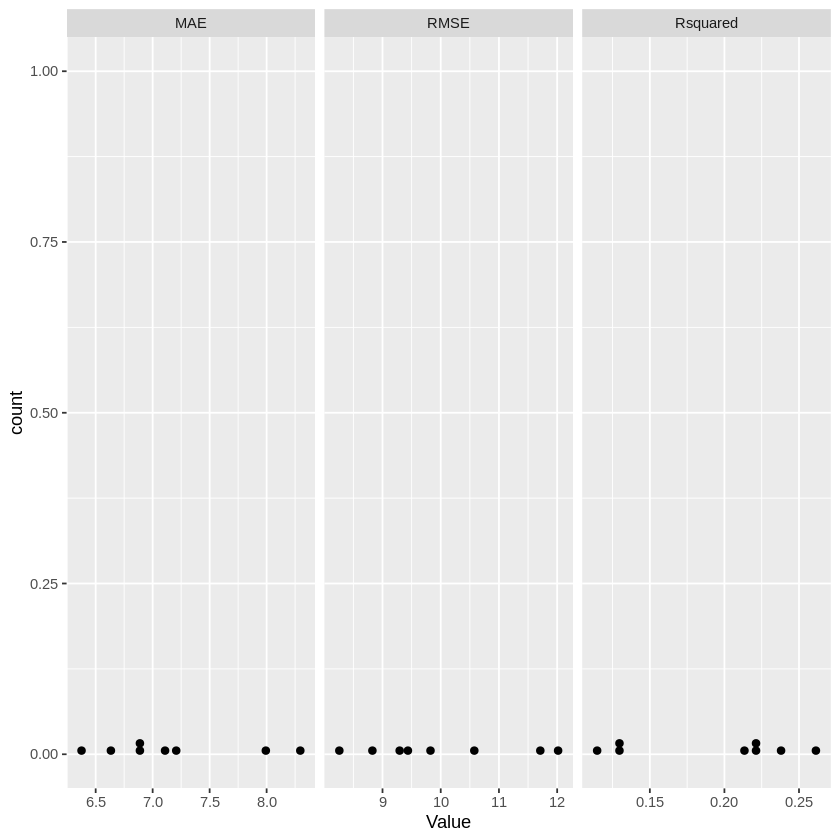

In [61]:
ggplot(KFold_Outcomes_Stacked, aes(x=Value)) +
 geom_dotplot() +
 facet_grid(. ~ Statistic, scales = "free_x") 



---



---



## CARET Package: Repeated Split-Sample

Here, a *repeated* Split-Sample (or Test/Train) method is used for cross-validaiton.

In [57]:
#Using the caret package to conduct monte carlo cross validation
#Here, the boot (bootstrap) is being specifed with p=75%, 100 repeated splits will be done
cv_settings <- trainControl(method = "boot", p=0.75, number=500)

SplitSampleRepeatedCV_TeacherTurnoverRate_AvgTeacherSalary <- train(
                                                                    TeacherTurnoverRate ~ Avg_TeacherSalary,   # model to fit
                                                                    data = TeacherTurnover_NoNAs,              # data used for the fit     
                                                                    trControl = cv_settings,                   # settings for cross-validation
                                                                    method = "lm",                             # specifying a regression model
                                                                    na.action = na.pass                        # helps with NA
                                                                    )

#Print the output
SplitSampleRepeatedCV_TeacherTurnoverRate_AvgTeacherSalary  

Linear Regression 

1053 samples
   1 predictor

No pre-processing
Resampling: Bootstrapped (500 reps) 
Summary of sample sizes: 1053, 1053, 1053, 1053, 1053, 1053, ... 
Resampling results:

  RMSE      Rsquared  MAE     
  10.03945  0.186057  7.175192

Tuning parameter 'intercept' was held constant at a value of TRUE

Getting some summaries from the b=500 repeated split-sample cross-validation outcomes.

Statistic,Mean,Range,Count
<chr>,<dbl>,<dbl>,<int>
MAE,7.175192,1.6253292,500
RMSE,10.039450,3.0842623,500
Rsquared,0.186057,0.1819452,500


Bin width defaults to 1/30 of the range of the data. Pick better value with `binwidth`.



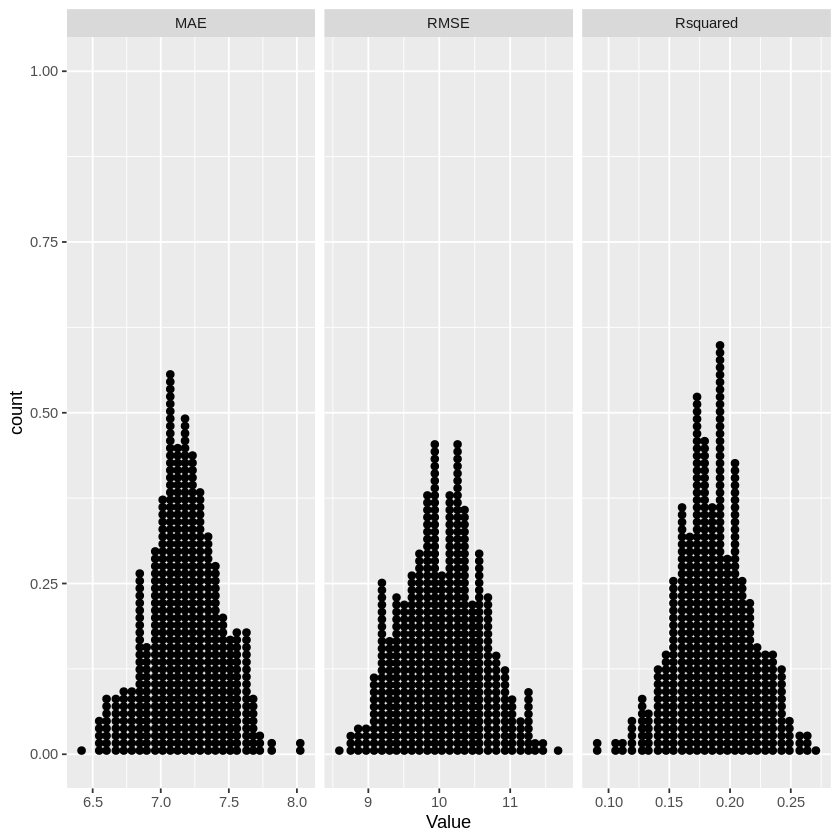

In [58]:
#Save the resample outcomes
SplitSampleRepeated_Outcomes <- SplitSampleRepeatedCV_TeacherTurnoverRate_AvgTeacherSalary$resample

#Stack the outcome for easier summaries / plotting
(SplitSampleRepeated_Outcomes 
    %>% pivot_longer(c(RMSE, Rsquared, MAE), names_to = "Statistic", values_to = "Value")
) -> SplitSampleRepeated_Outcomes_Stacked

#Getting some basic summaries
(SplitSampleRepeated_Outcomes_Stacked
  %>% group_by(Statistic)
  %>% summarize(Mean = mean(Value), Range = max(Value) - min(Value), Count = n())
)

#Creating some simple dotplots of the outcomes
ggplot(SplitSampleRepeated_Outcomes_Stacked, aes(x=Value)) +
 geom_dotplot() +
 facet_grid(. ~ Statistic, scales = "free_x") 

## Task

Above, the various cross-validation methods have been applied to the model $TeacherTurnoverRate \sim Avg\_TeacherSalary$.  




1.  Pick a second model from above and apply the $K-Fold$ and $Monte \space Carlo$ cross-validation methods to your choosen model. How well does your model cross-validate?  Briefly discuss.

2.   There is another cross-validation method called *repeated* $K-Fold$. How would you suppose this methods works?  How would the cross-validated $RMSE$ statistic be computed with this method?  Discuss.

3.   Figure out how to get the caret() package to run the *repeated* $K-Fold$ cross-validation method on the same model from Task #1.  How does the $RMSE$ from a single iteration of $K-Fold$ compare to the $RMSE$ the a repeated $K-Fold$?  Briefly discuss.



---



---


End of Document